### **INDEX**
1. Setup Notebook
2. Histogram
3. Bar chart
4. Line chart
3. Saving & Exporting 

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **1. SETUP NOTEBOOK**

In [64]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pathlib import Path

In [65]:
# get the current working directory as a Path object
path = os.getcwd()

# update the path to parent folder
path = os.path.abspath(os.path.join(path, os.pardir))

In [66]:
# setting up color palette for plots
palette = sns.color_palette("BrBG")

In [67]:
# import orders products customers
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [68]:
# check df
df_ords_prods_cust.shape

(27811929, 31)

In [69]:
df_ords_prods_cust.columns

Index(['user_id', 'm/f', 'state', 'age', 'date_joined', 'n_dependants',
       'maritial_status', 'income', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_type', 'order_frequency', 'customer_type',
       'region', 'activity_type', 'customer_profile'],
      dtype='object')

In [70]:
df_ords_prods_cust.head()

,user_id,m/f,state,age,date_joined,n_dependants,maritial_status,income,order_number,orders_day_of_week,...,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_type,order_frequency,customer_type,region,activity_type,customer_profile
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,1,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,2,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,3,3,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,3,3,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,3,3,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **2. HISTOGRAM**

In [73]:
# check number of orders per hour
df_ords_prods_cust.groupby('order_hour_of_day').size()

order_hour_of_day
0      189668
1      100542
2       58854
3       43207
4       44782
5       72682
6      235085
7      731813
8     1436586
9     2073493
10    2358401
11    2347798
12    2252424
13    2290106
14    2314421
15    2298281
16    2200954
17    1821359
18    1425783
19    1091746
20     840103
21     685330
22     550110
23     348401
dtype: int64

Text(0, 0.5, 'Total Number of Orders')

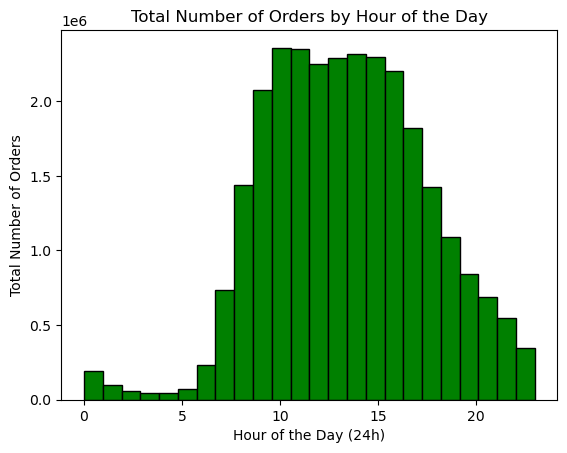

In [74]:
# create histogram of orders by hour of the day, with 24 bins representing each hour
hist = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24, color = 'green', edgecolor='black')
plt.title('Total Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day (24h)')
plt.ylabel('Total Number of Orders')

> The histogram reveals most orders occur between the times 10:00 and 17:00, tapering off into the evening. The left skew shape indicates that early morning orders are outliers, exceptionally orders are placed during the night.

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **3. BAR CHART**

Text(0, 0.5, 'Total Number of Orders')

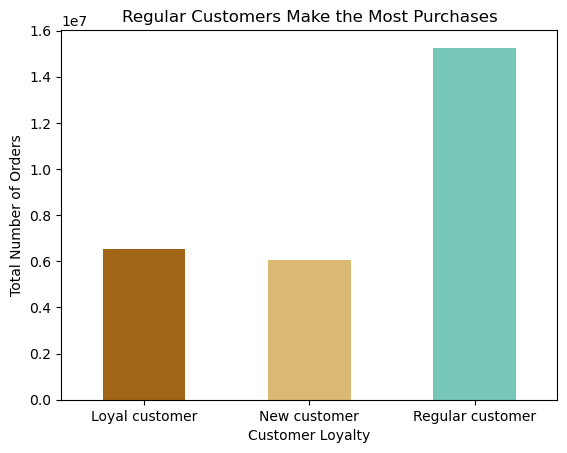

In [78]:
# create bar chart of distribution of orders in terms of customer loyalty

# setup design attributes
ls = palette[0]
nc = palette[1]
rc = palette[4]

# create plot
bar = df_ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar(color =[ls, nc, rc])

# create lay out
plt.title('Regular Customers Make the Most Purchases')
plt.xlabel('Customer Loyalty') 
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total Number of Orders')

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **4. LINE CHART**

Text(0, 0.5, 'Amount Spent')

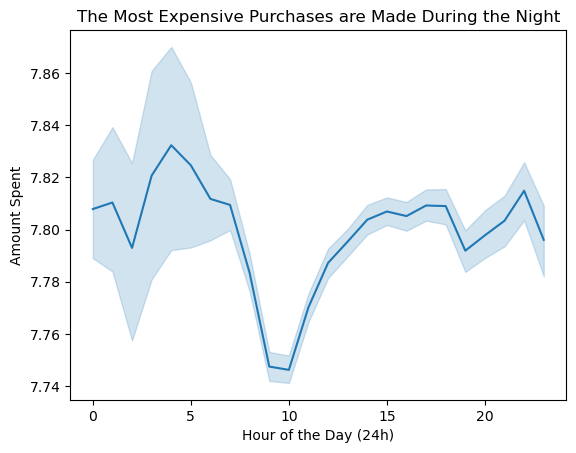

In [81]:
# create line chart to visualize expenditure during time of day
line = sns.lineplot(data = df_ords_prods_cust, x = 'order_hour_of_day',y = 'prices')
plt.title('The Most Expensive Purchases are Made During the Night')
plt.xlabel('Hour of the Day (24h)')
plt.ylabel('Amount Spent')

> Customers tend to spend more in the evening. Even though the highest expenditures are displayed to happen at night, the wide error band indicates uncertainty, warranting further investigation.

Text(0, 0.5, 'Size of Household')

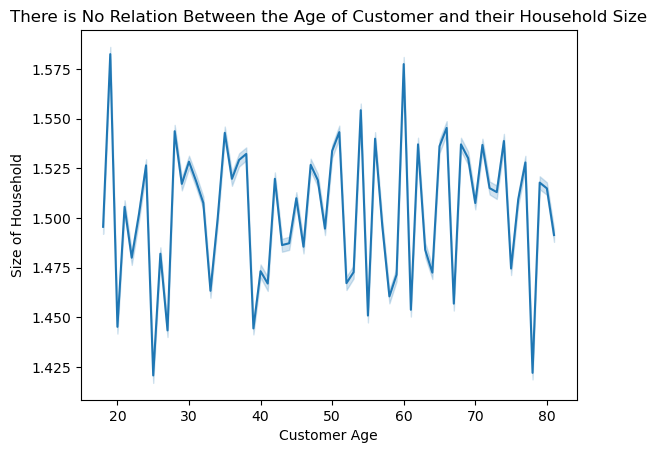

In [83]:
# create line chart to explore age & family situation correlations
line2 = sns.lineplot(data = df_ords_prods_cust, x = 'age', y = 'n_dependants')
plt.title('There is No Relation Between the Age of Customer and their Household Size')
plt.xlabel('Customer Age')
plt.ylabel('Size of Household')

> The line chart shows no relation between age and the number of dependant family members.

Text(0, 0.5, 'Income')

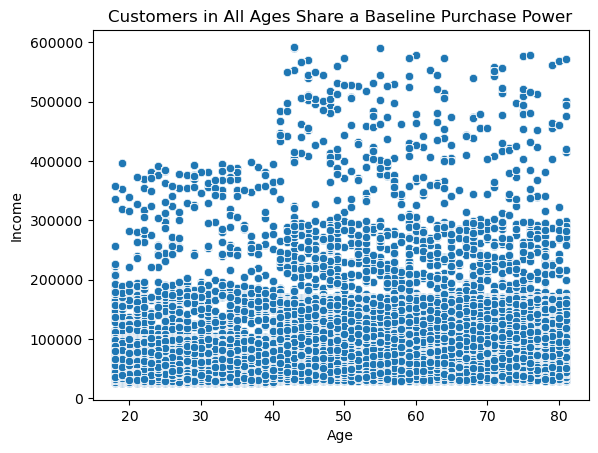

In [85]:
# create scatterplot chart to explore age & spending power correlations
scat = sns.scatterplot(data = df_ords_prods_cust, x = 'age',y = 'income')
plt.title('Customers in All Ages Share a Baseline Purchase Power')
plt.xlabel('Age')
plt.ylabel('Income')

> Despite its density, the scatterplot shows a clear correlation between age and income: for customers <40 years old, income is concentrated up to 200k with outliers between 200k - 400k. For those aged 40 years and older, income is dense up to 300k with a wider range of outliers extending to 600k.

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **5. SAVING & EXPORTING**

In [89]:
# save to export plots
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_timeofday.png'))

In [90]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_customerloyalty.png'))

In [91]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_spending_timeofday.png'))

In [92]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_family.png'))

In [93]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_spending_age.png'))